# Assignment 2: Principal Component Analysis, Neural Networks

Deadline: Tuesday, November 4th, 2025, 23:59

Environment: Python, numpy, pandas, matplotlib, scikit-learn, pytorch.

---

## Programming Exercises

### Part I: Eigenfaces for Face Recognition

1. **Load the Training and Test Sets**

   Load the training images contained in `data` into a matrix **X**.
   There are 540 training images, each with resolution $50 \times 50$. Flatten each image into a 2500-dimensional vector. Thus, **X** should have shape **$540 \times 2500$**, where each row is a flattened face image.

   Similarly, build the test matrix **$X_{test}$**, which should have shape **$100 \times 2500$**.

   Display an example training and test image in grayscale.

   Example code snippet for loading the training data:

   ```python
   import numpy as np
   from matplotlib import pylab as plt
   import matplotlib.cm as cm
   import imageio

   train_labels, train_data = [], []
   for line in open('./data/train.txt'):
       im = imageio.v2.imread("" + line.strip().split()[0])
       train_data.append(im.reshape(2500,))
       train_labels.append(line.strip().split()[1])
   train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

   print(train_data.shape, train_labels.shape)
   plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
   plt.show()
   ```



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
import imageio

In [6]:
np.random.seed(20)

In [7]:
# Configure matplotlib

plt.rcParams.update({"figure.figsize": [12, 4], "figure.dpi": 100})

In [23]:
# Load training data

train_labels, train_data = [], []
for line in open('../data/train.txt'):
    im = imageio.v2.imread("../" + line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])

X = np.array(train_data, dtype=float)
y_train = np.array(train_labels)
print(f"Training data shape: {X.shape}")

Training data shape: (540, 2500)


In [ ]:
# Load test data

test_labels, test_data = [], []
for line in open('../data/test.txt'):
    im = imageio.v2.imread("../" + line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])

X_test = np.array(test_data, dtype=float)
y_test = np.array(test_labels)
print(f"Test data shape: {X_test.shape}")

Test data shape: (100, 2500)


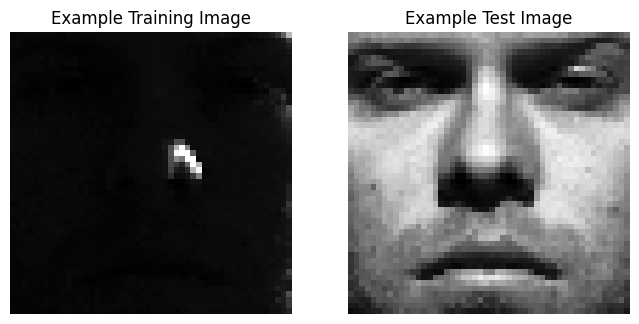

In [25]:
# Display example images

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Example Training Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_test[0].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Example Test Image")
plt.axis('off')
plt.show()


2. **Average Face**

   Compute the *average face* vector $ \mu $ by averaging all rows of **$X$**.
   Display this average face as a grayscale image.



Average face vector shape: (2500,)


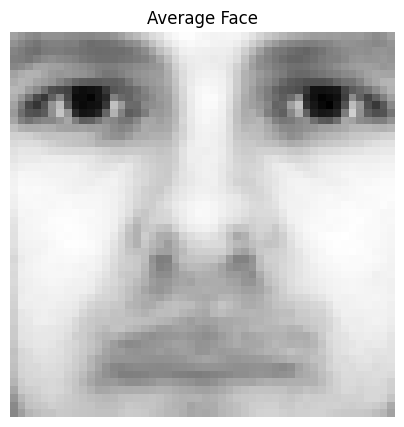

In [26]:
mu = np.mean(X, axis=0)
print(f"Average face vector shape: {mu.shape}")

# Display average face
plt.figure(figsize=(5, 5))
plt.imshow(mu.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.axis('off')
plt.show()

3. **Mean Subtraction**

   Subtract the average face $\mu$ from each row of **$X$**, i.e., replace each image vector $x_i$ with $x_i - \mu$.
   Display an example mean-subtracted image.
   Apply the same mean subtraction to **$X_{test}$**, using the same $\mu$.
   From now on, for training and testing, you should use the demeaned matrix.

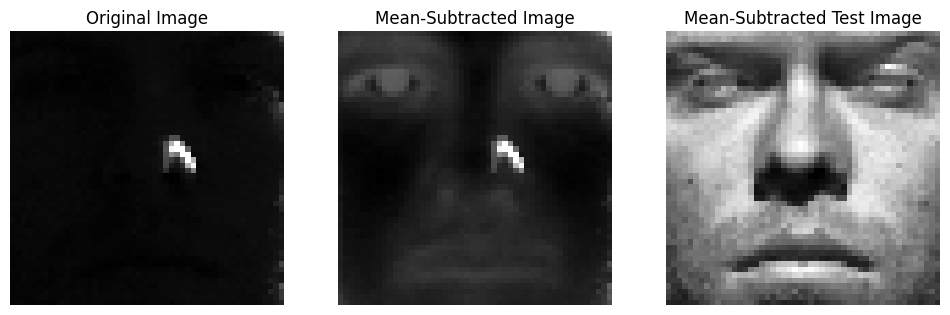

In [27]:
# Display example before mean subtraction

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X[0].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Original Image")
plt.axis('off')

# Subtract mean from training data

X = X - mu

# Display example after mean subtraction

plt.subplot(1, 3, 2)
plt.imshow(X[0].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Mean-Subtracted Image")
plt.axis('off')

# Apply same mean subtraction to test data

X_test = X_test - mu

plt.subplot(1, 3, 3)
plt.imshow(X_test[0].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Mean-Subtracted Test Image")
plt.axis('off')
plt.show()

4. **Eigenfaces**

   Compute the eigendecomposition of $X^T X = V \Lambda V^T$ to obtain eigenvectors.
   The rows of $V^T$ correspond to eigenfaces.

   Display 10 eigenfaces as grayscale images.

   Note: Eigenvectors may be complex-valued. You will need to convert them to real values before displaying (e.g., using `np.real`).

5. **Eigenface Features**

   The top $r$ eigenfaces span an $r$-dimensional **face space**.
   Represent an image vector $z$ in this space as:
   
$$
   f = [v_1, v_2, \ldots, v_r]^T z
$$

   Write a function to compute:

   * **$F$**: feature matrix for training data (shape: $540 \times r$)
   * **$F_{test}$**: feature matrix for test data (shape: $100 \times r$)

   by multiplying **$X$** and **$X_{test}$** with the top $ r$ eigenfaces.

6. **Face Recognition**

   Use **logistic regression** (e.g., from `scikit-learn`) for classification.

   * Extract features using $ r = 10 $ (supress the intercept, as it is not necessary because the matrix is demeaned)
   * Train logistic regression on **$F$** and evaluate on **$F_{test}$**
   * Report classification accuracy on the test set
   * Then repeat for $ r = 1, 2, \ldots, 200 $ and plot accuracy as a function of $ r $

7. **Low-Rank Reconstruction Loss**

   Reconstruct approximations $ X' $ from the features by multiplying:

$$
X' = F \cdot \text{(top } r \text{ eigenfaces)}
$$

   Compute and plot the average Frobenius distance:

$$
   d(X, X') = \sqrt{\text{tr}((X - X')^T (X - X'))}
$$

   for $ r = 1, 2, \ldots, 200 $.

# Part II: Neural Networks
Modify the example on Convolutional Neural Networks shown in the practical sessions, to use the original MNIST dataset. Create and train all models shown, and plot their convergence curves. To download the MNIST data, use:

In [ ]:
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch
from tqdm.notebook import tqdm

In [ ]:
batch_size = 64
num_classes = 10
learning_rate = 0.002
num_epochs = 10

mnist_train = datasets.MNIST(
    "/content/sample_data", download = True, train = True,
    transform = transforms.ToTensor()
)

mnist_test = datasets.MNIST(
    "/content/sample_data", train = False, transform = transforms.ToTensor()
)

train_imgs = torch.stack([img for img, _ in mnist_train], dim=0)
test_imgs = torch.stack([img for img, _ in mnist_test], dim=0)
train_mean, train_std = train_imgs.mean(), train_imgs.std()
test_mean, test_std = test_imgs.mean(), test_imgs.std()
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(test_mean, test_std)
])


train_data = DataLoader(mnist_train, batch_size = batch_size, shuffle = True)
test_data = DataLoader(mnist_test, batch_size = batch_size, shuffle = True)

Model A

In [ ]:
class LeNet5Base(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

Training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_base = LeNet5Base(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_base.parameters(), lr = learning_rate)
train_accuracy_base = []
test_accuracy_base = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_base.eval()

    with torch.no_grad():
      predictions = model_base(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_base(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_base.train()
    predictions = model_base(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_base.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_base(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_base += [train_accuracy]
  test_accuracy_base += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1| Train acc:  92.8767| Test acc:  96.5600
Epoch: 2| Train acc:  97.2767| Test acc:  97.6900
Epoch: 3| Train acc:  98.1183| Test acc:  98.2400
Epoch: 4| Train acc:  98.4567| Test acc:  98.1000
Epoch: 5| Train acc:  98.7017| Test acc:  98.5000
Epoch: 6| Train acc:  98.9133| Test acc:  98.5000
Epoch: 7| Train acc:  98.9483| Test acc:  98.3100
Epoch: 8| Train acc:  99.1867| Test acc:  98.3300
Epoch: 9| Train acc:  99.1600| Test acc:  98.5800
Epoch: 10| Train acc:  99.2600| Test acc:  98.1800


Model B

In [ ]:
class LeNet5Dropout(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.drop_layer = nn.Dropout(0.5)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.drop_layer(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

Training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_dropout = LeNet5Dropout(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_dropout.parameters(), lr = learning_rate)
train_accuracy_dropout = []
test_accuracy_dropout = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_dropout.eval()

    with torch.no_grad():
      predictions = model_dropout(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_dropout(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_dropout.train()
    predictions = model_dropout(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_dropout.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_dropout(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_dropout += [train_accuracy]
  test_accuracy_dropout += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1| Train acc:  92.0283| Test acc:  96.4800
Epoch: 2| Train acc:  97.0567| Test acc:  97.3500
Epoch: 3| Train acc:  97.7950| Test acc:  98.0100
Epoch: 4| Train acc:  98.2117| Test acc:  98.0500
Epoch: 5| Train acc:  98.4417| Test acc:  98.5100
Epoch: 6| Train acc:  98.5400| Test acc:  98.3800
Epoch: 7| Train acc:  98.7400| Test acc:  98.4900
Epoch: 8| Train acc:  98.7150| Test acc:  98.6300
Epoch: 9| Train acc:  98.8000| Test acc:  98.6500
Epoch: 10| Train acc:  98.8333| Test acc:  98.6300


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_decay = LeNet5Base(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_decay.parameters(), lr = learning_rate, weight_decay = .001)
train_accuracy_decay = []
test_accuracy_decay = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_decay.eval()

    with torch.no_grad():
      predictions = model_decay(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_decay(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_decay.train()
    predictions = model_decay(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_decay.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_decay(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_decay += [train_accuracy]
  test_accuracy_decay += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1| Train acc:  92.6267| Test acc:  96.9300
Epoch: 2| Train acc:  97.0450| Test acc:  97.4900
Epoch: 3| Train acc:  97.5283| Test acc:  97.8900
Epoch: 4| Train acc:  97.7383| Test acc:  97.9900
Epoch: 5| Train acc:  97.8800| Test acc:  97.9900
Epoch: 6| Train acc:  98.0033| Test acc:  97.9500
Epoch: 7| Train acc:  97.9833| Test acc:  98.6500
Epoch: 8| Train acc:  98.0900| Test acc:  97.5400
Epoch: 9| Train acc:  98.1733| Test acc:  98.1600
Epoch: 10| Train acc:  98.1383| Test acc:  98.2100


Model C

In [ ]:
class LeNet5BatchNorm(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(400, 120)
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.tanh(out)
        out = self.fc1(out)
        out = self.tanh1(out)
        out = self.fc2(out)
        return out

Training

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_batch_norm = LeNet5BatchNorm(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_batch_norm.parameters(), lr = learning_rate)
train_accuracy_batch_norm = []
test_accuracy_batch_norm = []

for epoch in tqdm(range(num_epochs)):
  train_correct = 0
  test_correct = 0
  train_total = 0
  test_total = 0

  for images, labels in train_data:
    images, labels = images.to(device), labels.to(device)
    model_batch_norm.eval()

    with torch.no_grad():
      predictions = model_batch_norm(images)
      train_total += labels.size(0)
      _, predictions = torch.max(model_batch_norm(images).data, 1)
      train_correct += (predictions == labels).sum().item()

    model_batch_norm.train()
    predictions = model_batch_norm(images)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  for images, labels in test_data:
    images, labels = images.to(device), labels.to(device)
    model_batch_norm.eval()

    with torch.no_grad():
      _, predictions = torch.max(model_batch_norm(images).data, 1)
      test_total += labels.size(0)
      test_correct += (predictions == labels).sum().item()

  train_accuracy = 100 * train_correct / train_total
  test_accuracy = 100 * test_correct / test_total
  train_accuracy_batch_norm += [train_accuracy]
  test_accuracy_batch_norm += [test_accuracy]
  print(f"Epoch: {epoch + 1}| Train acc: {train_accuracy: .4f}| Test acc: {test_accuracy: .4f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1| Train acc:  95.2533| Test acc:  98.0200
Epoch: 2| Train acc:  97.8117| Test acc:  98.1700
Epoch: 3| Train acc:  98.4800| Test acc:  97.6400
Epoch: 4| Train acc:  98.5000| Test acc:  98.4700
Epoch: 5| Train acc:  98.8933| Test acc:  98.9300
Epoch: 6| Train acc:  99.0033| Test acc:  98.9100
Epoch: 7| Train acc:  98.9800| Test acc:  98.0200
Epoch: 8| Train acc:  99.1300| Test acc:  98.6100
Epoch: 9| Train acc:  99.1717| Test acc:  98.8400
Epoch: 10| Train acc:  99.2967| Test acc:  98.9500


Convergence

Text(0, 0.5, 'Accuracy (%)')

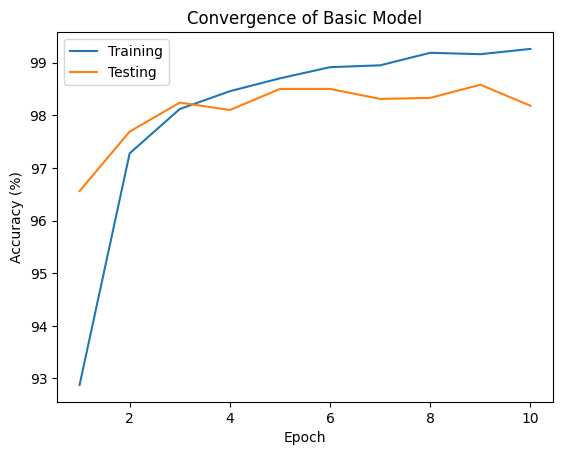

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_accuracy_base, label = "Training")
plt.plot(range(1, num_epochs + 1), test_accuracy_base, label = "Testing")
plt.legend()
plt.title("Convergence of Basic Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

Text(0, 0.5, 'Accuracy (%)')

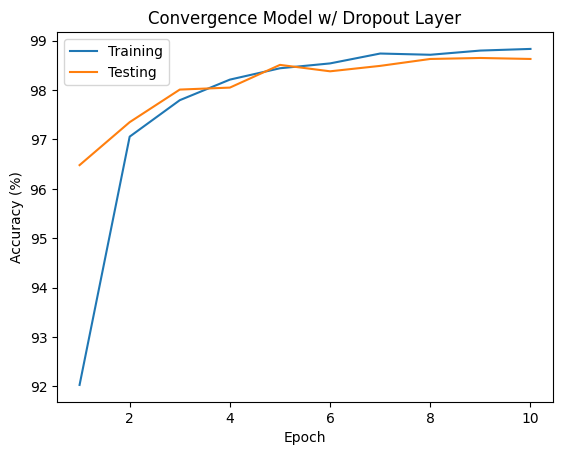

In [ ]:
plt.plot(range(1, num_epochs + 1), train_accuracy_dropout, label = "Training")
plt.plot(range(1, num_epochs + 1), test_accuracy_dropout, label = "Testing")
plt.legend()
plt.title("Convergence Model w/ Dropout Layer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

Text(0, 0.5, 'Accuracy (%)')

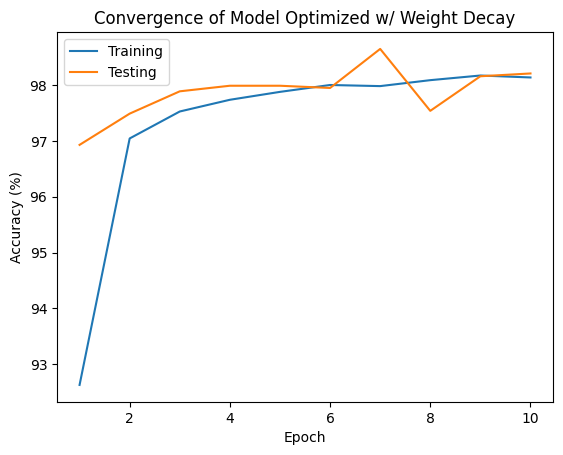

In [ ]:
plt.plot(range(1, num_epochs + 1), train_accuracy_decay, label = "Training")
plt.plot(range(1, num_epochs + 1), test_accuracy_decay, label = "Testing")
plt.legend()
plt.title("Convergence of Model Optimized w/ Weight Decay")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

Text(0, 0.5, 'Accuracy (%)')

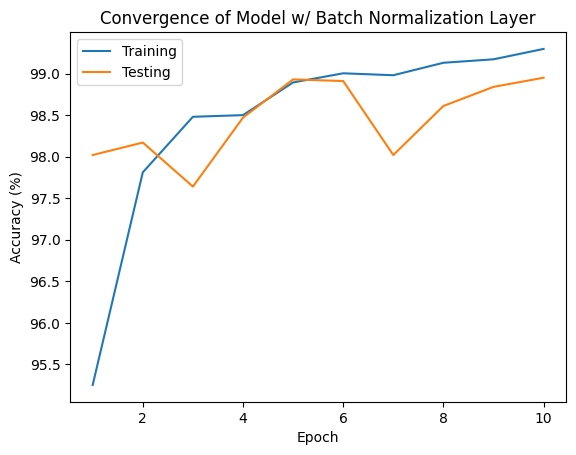

In [ ]:
plt.plot(range(1, num_epochs + 1), train_accuracy_batch_norm, label = "Training")
plt.plot(range(1, num_epochs + 1), test_accuracy_batch_norm, label = "Testing")
plt.legend()
plt.title("Convergence of Model w/ Batch Normalization Layer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

In [ ]:
import pandas as pd

model_names = ["Base", "Dropout", "Weight Decay", "Batch Normalization"]
final_train_accuracies = [train_accuracy_base[-1], train_accuracy_dropout[-1], train_accuracy_decay[-1], train_accuracy_batch_norm[-1]]
final_test_accuracies = [test_accuracy_base[-1], test_accuracy_dropout[-1], test_accuracy_decay[-1], test_accuracy_batch_norm[-1]]

pd.DataFrame({
    "Model": model_names,
    "Training Accuracy": final_train_accuracies,
    "Testing Accuracy": final_test_accuracies
})

,Model,Training Accuracy,Testing Accuracy
0,Base,99.260000,98.18
1,Dropout,98.833333,98.63
2,Weight Decay,98.138333,98.21
3,Batch Normalization,99.296667,98.95
